In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import wordcloud
import seaborn as sns

In [3]:
df = pd.read_excel('Resources/rotten_tomatoes_movies_new.xlsx')

In [4]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
3,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
4,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137


# Time Series Analysis

In [5]:
# converting the pandas dataframe to datatime format
df['original_release_date'] = pd.to_datetime(df['original_release_date'])
df['original_release_year'] = df['original_release_date'].dt.year
df['original_release_month'] = df['original_release_date'].dt.month
df['original_release_month_name'] = df['original_release_date'].dt.month_name()

df['streaming_release_date'] = pd.to_datetime(df['streaming_release_date'])
df['streaming_release_year'] = df['streaming_release_date'].dt.year
df['streaming_release_month'] = df['streaming_release_date'].dt.month
df['streaming_release_month_name'] = df['streaming_release_date'].dt.month_name()

In [6]:
# creating a series of time data

ori_year = df['original_release_year'].value_counts()
stream_year = df['streaming_release_year'].value_counts()

# creating a dataframe

ori_df = pd.DataFrame({'year': ori_year.index, 'ori_year': ori_year.values})
stream_df = pd.DataFrame({'year': stream_year.index, 'stream_year': stream_year.values})

year_df = pd.merge(ori_df, stream_df, how = 'right', on = 'year')
year_df.fillna('0', inplace = True)
year_df['ori_year'] = year_df.ori_year.astype('int')

year_df = year_df.sort_values('year', ascending = False).reset_index(drop = True)
year_df.head()

,year,ori_year,stream_year
0,2020.0,261,581
1,2019.0,526,948
2,2018.0,645,981
3,2017.0,580,3451
4,2016.0,624,5878


/var/folders/46/8xmf16t94sz0yrmf_f1fnht80000gn/T/ipykernel_1099/3044294933.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


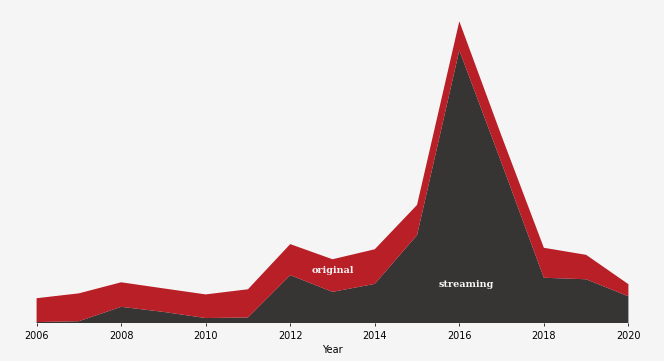

In [7]:
## visulaization

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'streaming', 'original']

# stackplot
ax.stackplot(year_df.year[0:15], year_df.stream_year[0:15],year_df.ori_year[0:15],labels =labels, 
              colors = ['#221f1f','#b20710',], baseline = 'zero', alpha = 0.9 )


# legend
ax.text(2012.5, 1100, '{}'.format(labels[1]), {'font':'serif',  'color':'#f6f5f5', 'weight':'bold'})
ax.text(2015.5, 800, '{}'.format(labels[0]),{'font':'serif',  'color':'#f6f5f5','weight':'bold'}) 

#title
 
# ax.text(2006.5, 3600, 'Visualization of Yearwise Leadtimes', 
#                       {'font':'serif', 'weight': 'bold','color': 'black'})

plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
ax.set(xlabel = 'Year')
fig.show()

# In Which Month Does Most of The Content released?

In [8]:
ori_month = df['original_release_month'].value_counts()
ori_month

1.0     1842
10.0    1606
6.0     1484
9.0     1469
8.0     1418
12.0    1376
4.0     1341
3.0     1336
11.0    1254
5.0     1209
7.0     1100
2.0     1078
Name: original_release_month, dtype: int64

/var/folders/46/8xmf16t94sz0yrmf_f1fnht80000gn/T/ipykernel_1099/1637171777.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


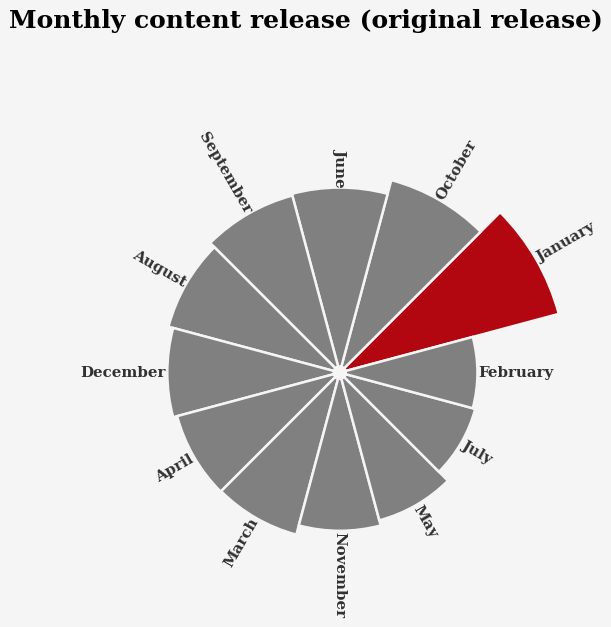

In [9]:
# initialize the figure
fig = plt.figure(figsize=(14,7), dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax = plt.subplot(polar=True)
plt.axis('off')


## labels
label_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
lab = ori_month.index
labels = lab.map(label_map)

colors = ['#b20710', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']


# Constants = parameters controling the plot layout:
upperLimit = 1000
lowerLimit = 50
labelPadding = 10

# Compute max and min in the dataset
max = ori_month.max()

slope = (max - lowerLimit) / max
heights = slope * ori_month.values + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(ori_month.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(ori_month)+1))
angles = [element * width for element in indexes]


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#f6f5f5",
    color = colors,
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",**{'font':'serif', 'size':12, 'weight':'bold','color':'black'},alpha = 0.8) 

fig.text(0.25,1.05,'Monthly content release (original release)',{'font':'serif', 'size':20, 'weight':'bold','color':'black'})
fig.show()

In [10]:
stream_month = df['streaming_release_month'].value_counts()
stream_month

8.0     2374
11.0    2213
4.0     2014
3.0     1605
1.0     1583
5.0     1420
12.0    1204
2.0     1138
10.0    1120
9.0     1019
6.0      850
7.0      754
Name: streaming_release_month, dtype: int64

/var/folders/46/8xmf16t94sz0yrmf_f1fnht80000gn/T/ipykernel_1099/4221027219.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


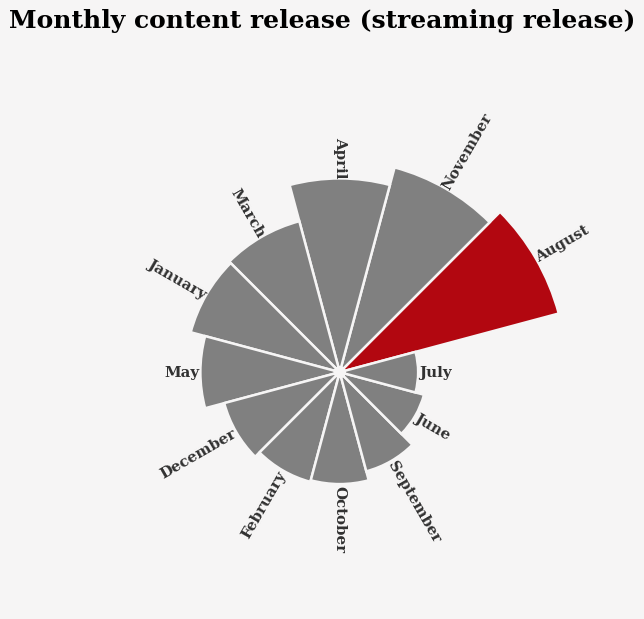

In [11]:
# initialize the figure
fig = plt.figure(figsize=(14,7), dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax = plt.subplot(polar=True)
plt.axis('off')


## labels
label_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
lab = stream_month.index
labels = lab.map(label_map)

colors = ['#b20710', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']


# Constants = parameters controling the plot layout:
upperLimit = 1000
lowerLimit = 50
labelPadding = 10

# Compute max and min in the dataset
max = stream_month.max()

slope = (max - lowerLimit) / max
heights = slope * stream_month.values + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(stream_month.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(stream_month)+1))
angles = [element * width for element in indexes]


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#f6f5f5",
    color = colors,
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",**{'font':'serif', 'size':12, 'weight':'bold','color':'black'},alpha = 0.8) 

fig.text(0.25,1.05,'Monthly content release (streaming release)',{'font':'serif', 'size':20, 'weight':'bold','color':'black'})
fig.show()

# Movie title analysis

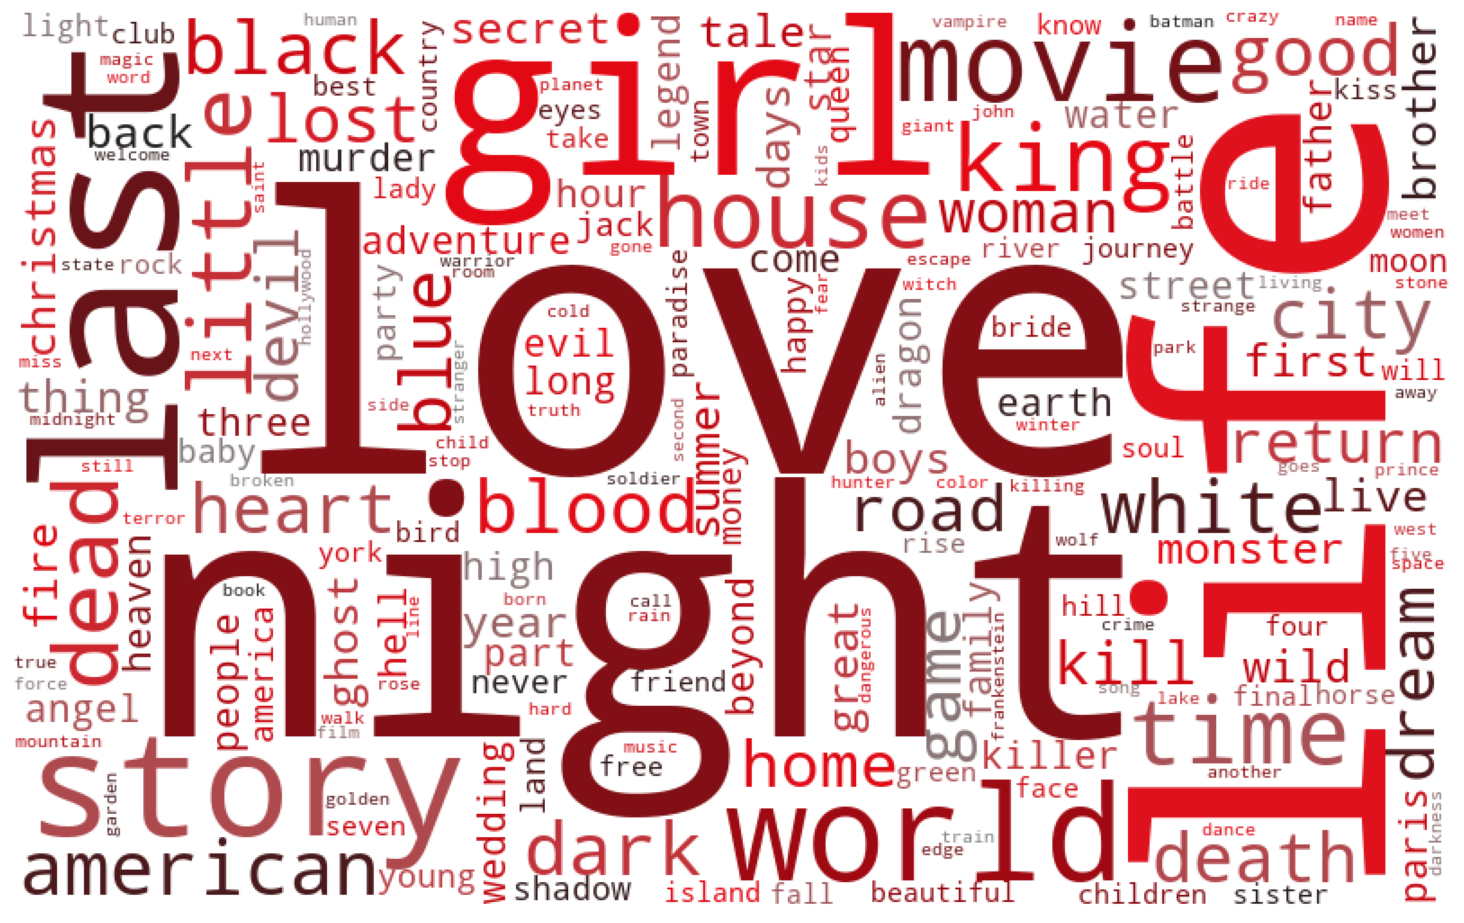

In [12]:
# importing all necessery modules a
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 

for word in df.movie_title:
#     print(word)
    words = word.split(' ')
    for i in words:
        token = i.lower()
        comment_words += "".join(token) + ' '

colors = ['#221f1f', '#b20710', '#e50914','grey']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', min_word_length = 4,
                stopwords = stopwords, colormap = colormap,
                min_font_size = 10).generate(comment_words) 

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('MV_title.png')
plt.show() 

# Movie duration analysis

In [13]:
duration = df.runtime.value_counts()
df_duration = pd.DataFrame(duration)
df_duration = df_duration.reset_index()
df_duration.columns = ['Duration', 'Counts']
df_duration
Movie_duration = df_duration.Duration
Movie_count = df_duration.Counts
duration

90.0     832
95.0     603
93.0     539
100.0    539
96.0     511
        ... 
254.0      1
213.0      1
191.0      1
240.0      1
255.0      1
Name: runtime, Length: 190, dtype: int64

In [15]:
Movie_duration_temp = (pd.DataFrame({'Movie_duration': Movie_duration, 'Movie_count': Movie_count})
        .sort_values('Movie_count', ascending = False))

Movie_duration_temp.reset_index(drop = True, inplace = True)



Movie_duration_temp['Movie_duration'] = Movie_duration_temp['Movie_duration'].astype('int64')
Movie_duration_temp['Movie_category'] = pd.cut(Movie_duration_temp['Movie_duration'], 
                                               bins = [0,30,60,90,120,150,180,210,240],
                                               labels = ['below 30 mins', 'between 30 and 60 mins',
                                                         'between 60 and 90 mins' ,
                                                         'between 90 and 120 mins',
                                                         'between 120 and 150 mins',
                                                         'between 150 and 180 mins',
                                                         'between 210 and 240 mins',
                                                         'between 240 and 1000 mins',
                                                         ])
Movie_duration_temp

,Movie_duration,Movie_count,Movie_category
0,90,832,between 60 and 90 mins
1,95,603,between 90 and 120 mins
2,93,539,between 90 and 120 mins
3,100,539,between 90 and 120 mins
4,96,511,between 90 and 120 mins
...,...,...,...
185,238,1,between 240 and 1000 mins
186,206,1,between 210 and 240 mins
187,57,1,between 30 and 60 mins
188,30,1,below 30 mins


/var/folders/46/8xmf16t94sz0yrmf_f1fnht80000gn/T/ipykernel_1099/1095010423.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


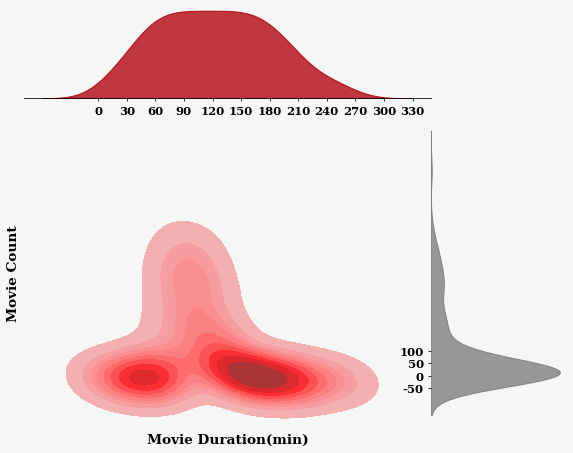

In [31]:
fig = plt.figure(figsize = (10,8), dpi = 70)

fig.patch.set_facecolor('#f5f6f6')

gs = fig.add_gridspec(4,4)
gs.update(wspace = 0., hspace = 0.2)

ax1 = fig.add_subplot(gs[0,0:3])
ax2 = fig.add_subplot(gs[1:4,0:3])
ax3 = fig.add_subplot(gs[1:4, 3:4])


axes = [ax1, ax2, ax3]

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    for loc in ['left', 'right', 'top','bottom']:
        ax.spines[loc].set_visible(False)

ax2.axes.get_xaxis().set_visible(True)
ax2.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax3.axes.get_yaxis().set_visible(True)
ax1.spines['bottom'].set_visible(True)
sns.kdeplot( x = 'Movie_duration',data = Movie_duration_temp, ax = ax1, shade = True, color = '#b20710', alpha = 0.8)
sns.kdeplot( y = 'Movie_count', data = Movie_duration_temp, ax = ax3, shade = True, color = 'grey', alpha = 0.8)
sns.kdeplot(x = 'Movie_duration', y = 'Movie_count', data = Movie_duration_temp, ax =ax2, color = '#b20710', shade  = True)

ax2.set_xlabel('Movie Duration(min)',{'font':'serif', 'size':14, 'weight':'bold', })
ax2.set_ylabel('Movie Count',{'font':'serif', 'size':14, 'weight':'bold', })
ax3.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xticks(ticks = [])
ax2.set_yticks(ticks = [])

ax1.set_xticks(ticks = np.arange(0, 360, 30))
ax1.set_xticklabels(np.arange(0, 360, 30),**{'font':'serif', 'size':12, 'weight':'bold', })
ax3.set_yticks(ticks = np.arange(-50, 150, 50))
ax3.set_yticklabels(np.arange(-50, 150, 50),**{'font':'serif', 'size':12, 'weight':'bold', })

fig.show()

In [142]:
duration = df.runtime.value_counts()
duration

90.0     832
95.0     603
93.0     539
100.0    539
96.0     511
        ... 
254.0      1
213.0      1
191.0      1
240.0      1
255.0      1
Name: runtime, Length: 190, dtype: int64

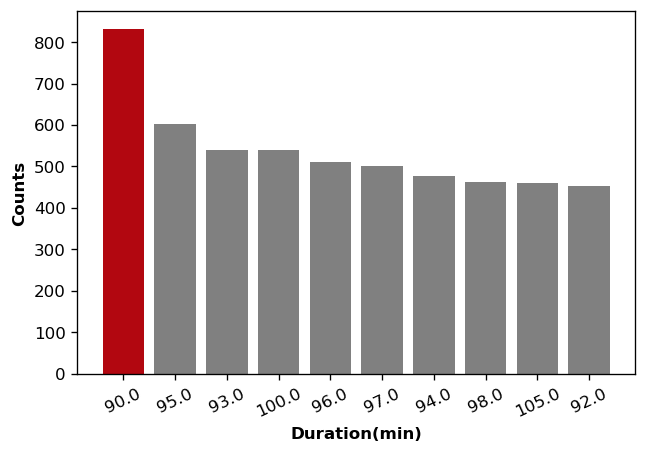

In [209]:
prob = df.runtime.value_counts()
threshold = 450
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
# # prob['other'] = tail_prob
# batlist = plt.bar(prob)
# batlist[0].set_color('r')
# plt.xticks(rotation=25)
# plt.xlabel('Duration(min)')
# plt.ylabel('Counts')
# plt.title('Top 10 Movie Duration')
# plt.show()

df_prob = pd.DataFrame(duration)
df_prob = df_prob.reset_index()
df_prob.columns = ['Duration', 'Counts']
df_prob = df_prob.head(10)
df_prob
Movie_duration = df_prob.Duration
Movie_count = df_prob.Counts
Movie_duration

x_pos = np.arange(len(Movie_duration))

# Create bars with different colors
plt.bar(x_pos, Movie_count, color=['#b20710','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey'])

# Create names on the x-axis
plt.xticks(x_pos, Movie_duration)
plt.xticks(rotation=25)
plt.xlabel('Duration(min)',weight = 'bold')
plt.ylabel('Counts',weight = 'bold')
# Show graph
plt.savefig('MV_duration_top10.png')
plt.show()
